In [56]:
import pandas as pd
import os
import sys
import inspect
tweets = pd.read_csv('C:/Users/NHOM/Desktop/10ac/Twitter-Data-Analysis/data/cleaned_tweet_data.csv')
tweets.head()

,created_at,source,original_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,1,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,NaN,1,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,-1,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,-1,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,0,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN



#Find what columns we have
#Find how many data we have
#Find out what type of data there is in each column
#Check for missing values

In [57]:
tweets.columns


Index(['created_at', 'source', 'original_text', 'sentiment', 'polarity',
       'subjectivity', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place'],
      dtype='object')

In [58]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16374 entries, 0 to 16373
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16374 non-null  object 
 1   source              16374 non-null  object 
 2   original_text       16374 non-null  object 
 3   sentiment           16374 non-null  float64
 4   polarity            14521 non-null  float64
 5   subjectivity        16374 non-null  int64  
 6   lang                16374 non-null  object 
 7   favorite_count      14521 non-null  float64
 8   retweet_count       14521 non-null  float64
 9   original_author     16374 non-null  object 
 10  followers_count     16374 non-null  int64  
 11  friends_count       16374 non-null  int64  
 12  possibly_sensitive  6168 non-null   object 
 13  hashtags            16374 non-null  object 
 14  user_mentions       16374 non-null  object 
 15  place               10671 non-null  object 
dtypes: f

In [59]:
tweets.shape

(16374, 16)

In [60]:
#checking for missing value
print("The number of missing value(s) based on columns:\n{}".format(tweets.isnull().sum()))
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s) based on columns:
created_at                0
source                    0
original_text             0
sentiment                 0
polarity               1853
subjectivity              0
lang                      0
favorite_count         1853
retweet_count          1853
original_author           0
followers_count           0
friends_count             0
possibly_sensitive    10206
hashtags                  0
user_mentions             0
place                  5703
dtype: int64
The number of missing value(s): 21468
Columns having missing value(s):Index(['polarity', 'favorite_count', 'retweet_count', 'possibly_sensitive',
       'place'],
      dtype='object')


In [61]:
###data preparation
sys.path.append(os.path.abspath(os.path.join('..')))

In [62]:
from clean_tweets_dataframe import Clean_Tweets

In [63]:
tweets_df = pd.DataFrame(columns=['original_text','sentiment','lang','hashtags'])

tweets_df['original_text'] = tweets['original_text'].to_list()
tweets_df['sentiment'] =  tweets['sentiment'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()
tweets_df['hashtags'] =tweets['hashtags'].to_list()

tweets_df.head()

,original_text,sentiment,lang,hashtags
0,RT @NorthstarCharts: The 10-year yield is tell...,0.16,en,"[{'text': 'gold', 'indices': [116, 121]}, {'te..."
1,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,en,[]
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,en,[]
3,RT @charliebilello: The 30-year mortgage rate ...,0.00,en,[]
4,RT @biancoresearch: Rates rise until something...,-0.40,en,[]


<AxesSubplot:ylabel='sentiment'>

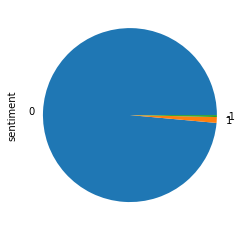

In [68]:
tweets_df.sentiment.value_counts().plot(kind='pie')

In [73]:
clean_tweet = pd.DataFrame(columns=['original_text','polarity'])
clean_tweet['original_text'] =  tweets['original_text'].to_list()
clean_tweet['polarity'] =  tweets['polarity'].to_list()

In [74]:
clean_tweet.dropna() # droping null values
clean_tweet.drop(clean_tweet.loc[clean_tweet['polarity']=="polarity"].index, inplace=True)
clean_tweet['polarity'] = pd.to_numeric(clean_tweet['polarity'])
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16374 entries, 0 to 16373
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   original_text  16374 non-null  object 
 1   polarity       14521 non-null  float64
dtypes: float64(1), object(1)
memory usage: 383.8+ KB


In [78]:
def make_score(p:float)->str:
    if(p > 0):
        return "positive"
    elif(p < 0):
        return "negative"
    else:
        return "neutral"

In [83]:
clean_tweet['type'] = clean_tweet.polarity.apply(make_score)
clean_tweet.head(10)

,original_text,polarity,score,tyoe,type
0,RT @NorthstarCharts: The 10-year yield is tell...,0.540000,positive,positive,positive
1,RT @MichaelAArouet: German 10y mortgage rate w...,NaN,neutral,neutral,neutral
2,RT @goldseek: When? https://t.co/kO2FfHKaZg,0.000000,neutral,neutral,neutral
3,RT @charliebilello: The 30-year mortgage rate ...,0.183333,positive,positive,positive
4,RT @biancoresearch: Rates rise until something...,0.400000,positive,positive,positive
5,RT @LanceRoberts: Buying opportunities like th...,0.550000,positive,positive,positive
6,RT @MacroAlf: Welcome to September 2018.\n\nBo...,0.637500,positive,positive,positive
7,RT @BotBenFranklin: The horse thinks one thing...,0.000000,neutral,neutral,neutral
8,RT @Galactic_Trader: Global growth optimism at...,0.250000,positive,positive,positive
9,RT @AndreasSteno: This is the most important c...,0.750000,positive,positive,positive


<AxesSubplot:>

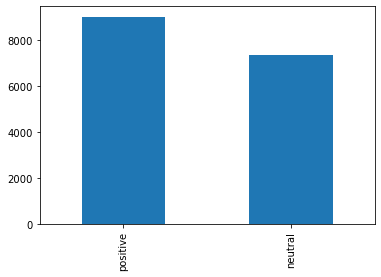

In [84]:
clean_tweet['type'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='type'>

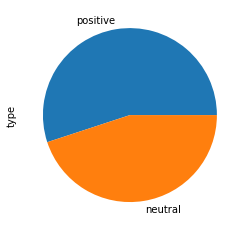

In [85]:
clean_tweet['type'].value_counts().plot(kind='pie')